In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud

In [6]:
df = pd.read_csv('/content/Reviews.csv')

In [7]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [8]:
print(df.shape)
print(df.isnull().values.any())
df.dropna(axis = 0 , inplace = True)
print(df.shape)

(34192, 10)
True
(34188, 10)


In [9]:
df.drop_duplicates(subset=['Score','Text'],keep='first',inplace=True)
print(df.shape)
df.head(10)


(32066, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


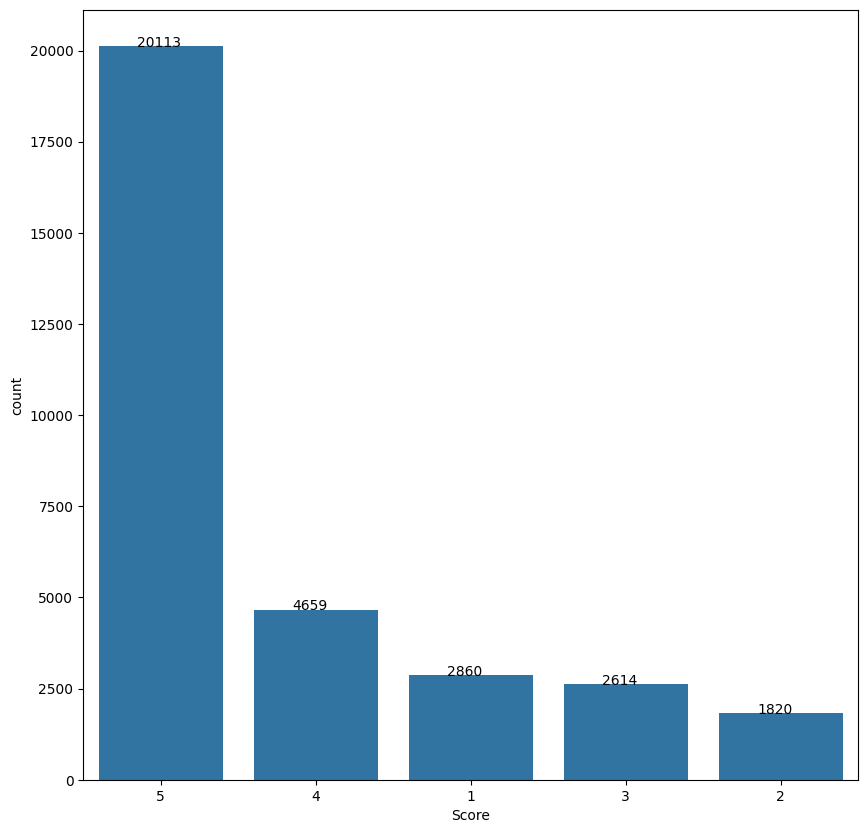

In [10]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x=df["Score"],  data=df, order = df["Score"].value_counts().index )
for p, label in zip(ax.patches, df["Score"].value_counts()):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

In [11]:
df.groupby('ProductId').count()
df_products = df.groupby('ProductId').filter(lambda x: len(x) >= 400)
df_product_groups = df_products.groupby('ProductId')
#Count of products and groups
print(len(df_products))
print(len(df_product_groups))

2682
5


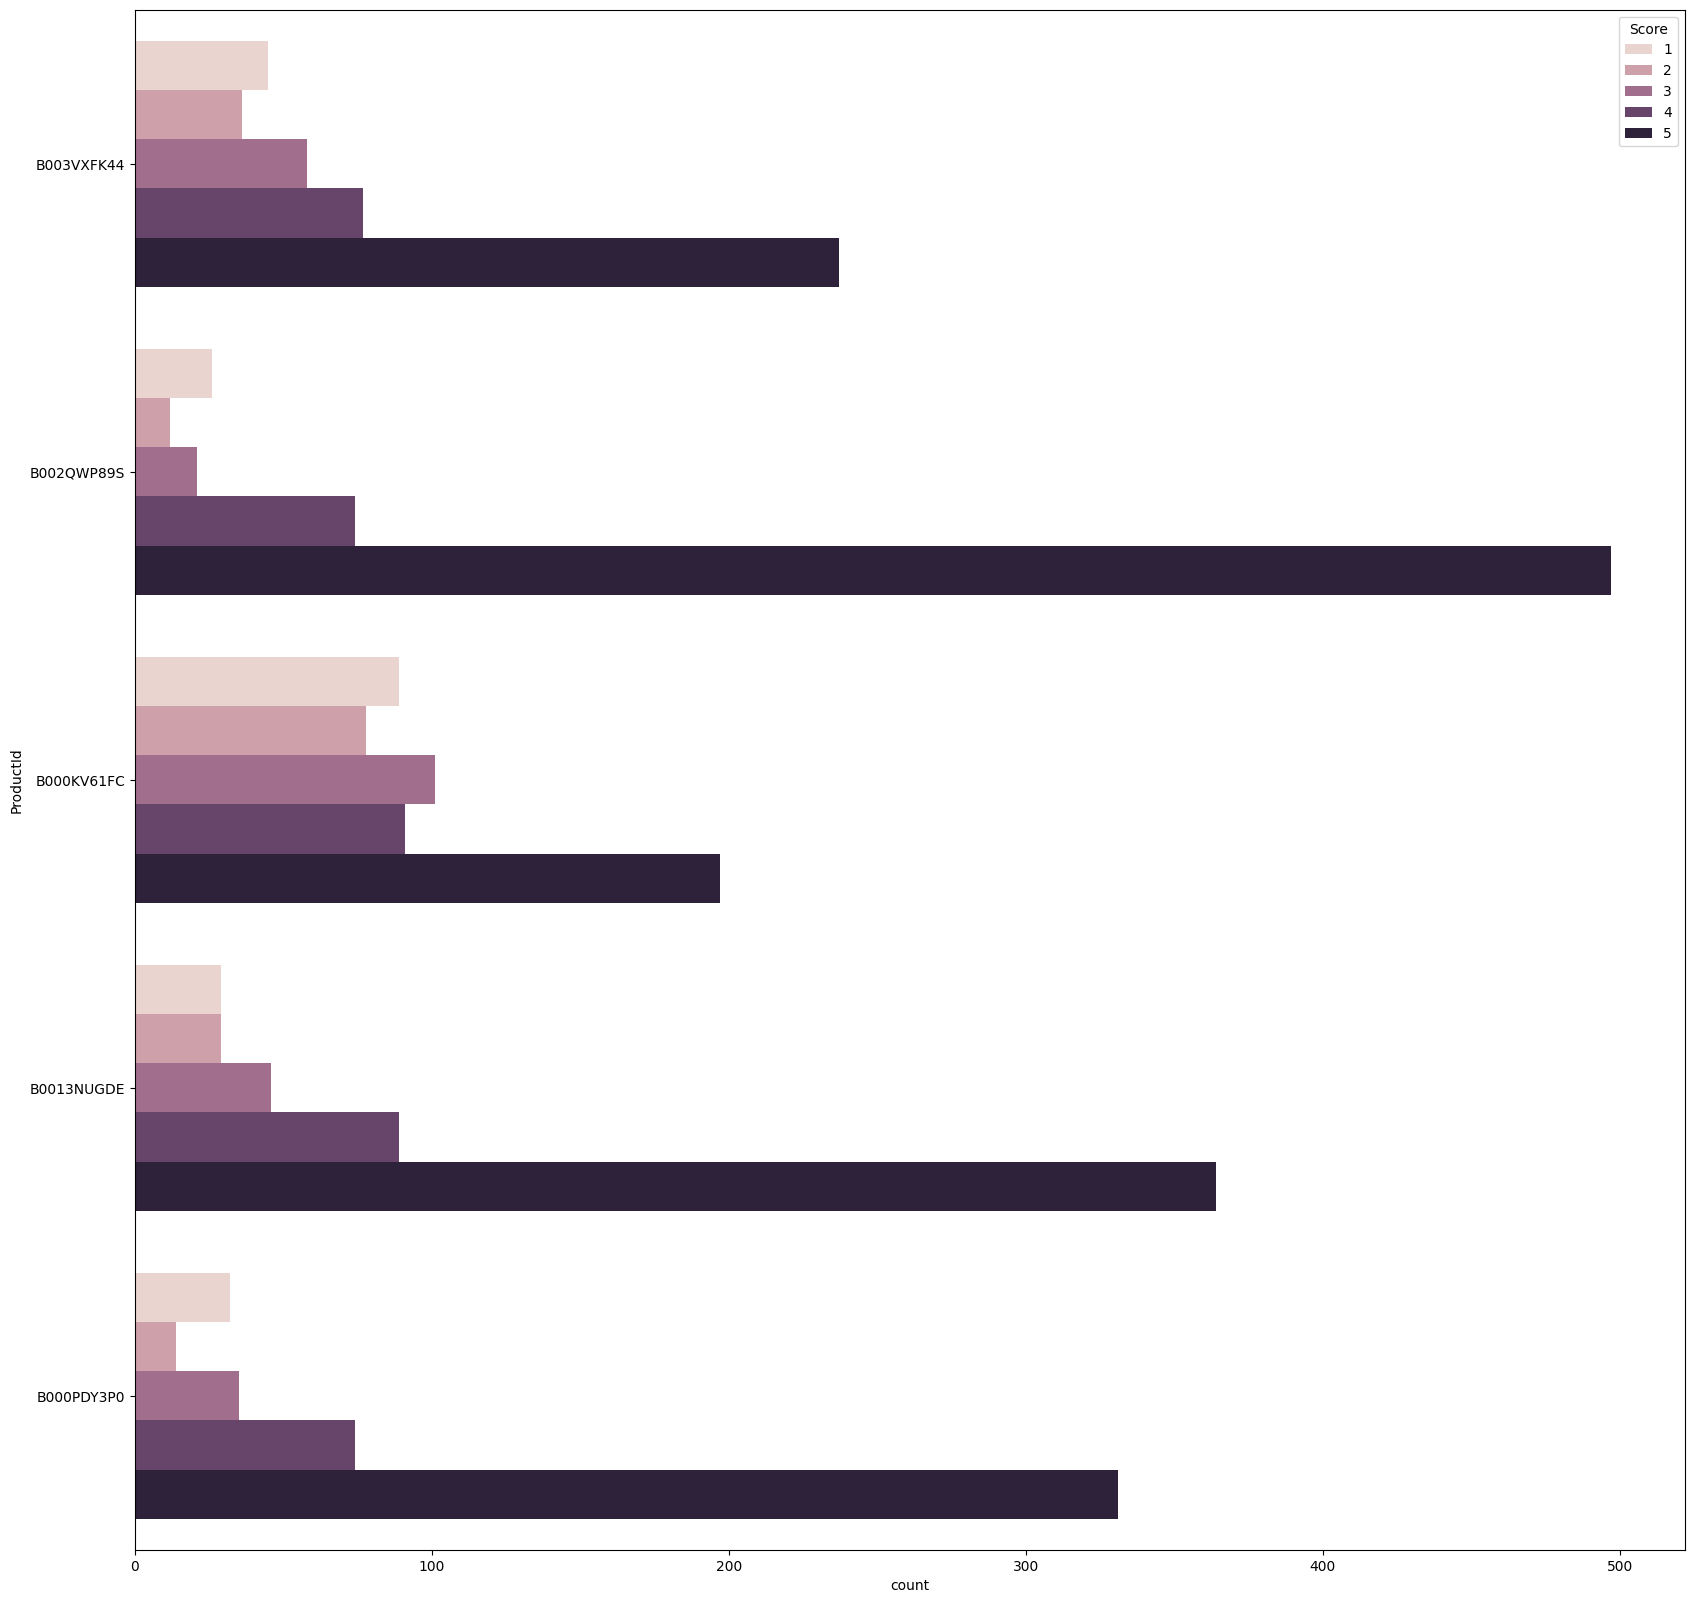

In [12]:
plt.figure(figsize=(20,20))
sns.countplot(y="ProductId",  hue="Score", data=df_products);

In [13]:
df.groupby('UserId').count()
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 100)
df_userGroup = df_users.groupby('UserId')
print("Number of Users:"+ str(len(df_userGroup)))
df_products = df_users.groupby('ProductId')
print("Number of products:"+ str(len(df_products)))

Number of Users:0
Number of products:0


In [14]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [15]:
def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize( text.lower() )
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist)
def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr])

    return text2.lower()

In [16]:
mask = (df["Score"] == 1) | (df["Score"] == 2)
df_rating1 = df[mask]
mask = (df["Score"]==4) | (df["Score"]==5) | (df["Score"]==3)
df_rating2 = df[mask]
print(len(df_rating1))
print(len(df_rating2))

4680
27386


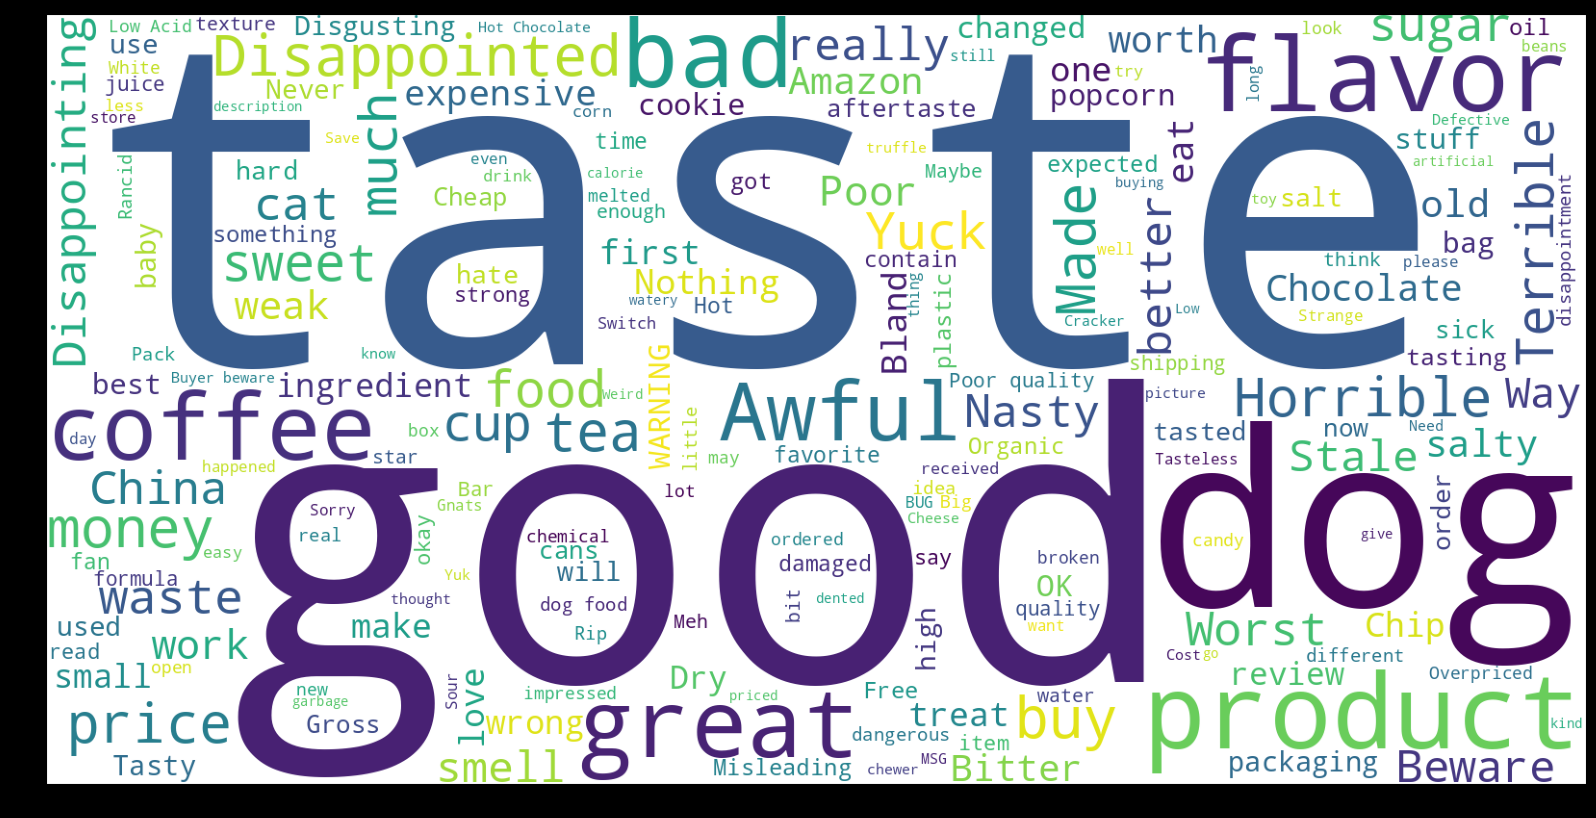

In [19]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating1['Summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

(-0.5, 1599.5, 799.5, -0.5)

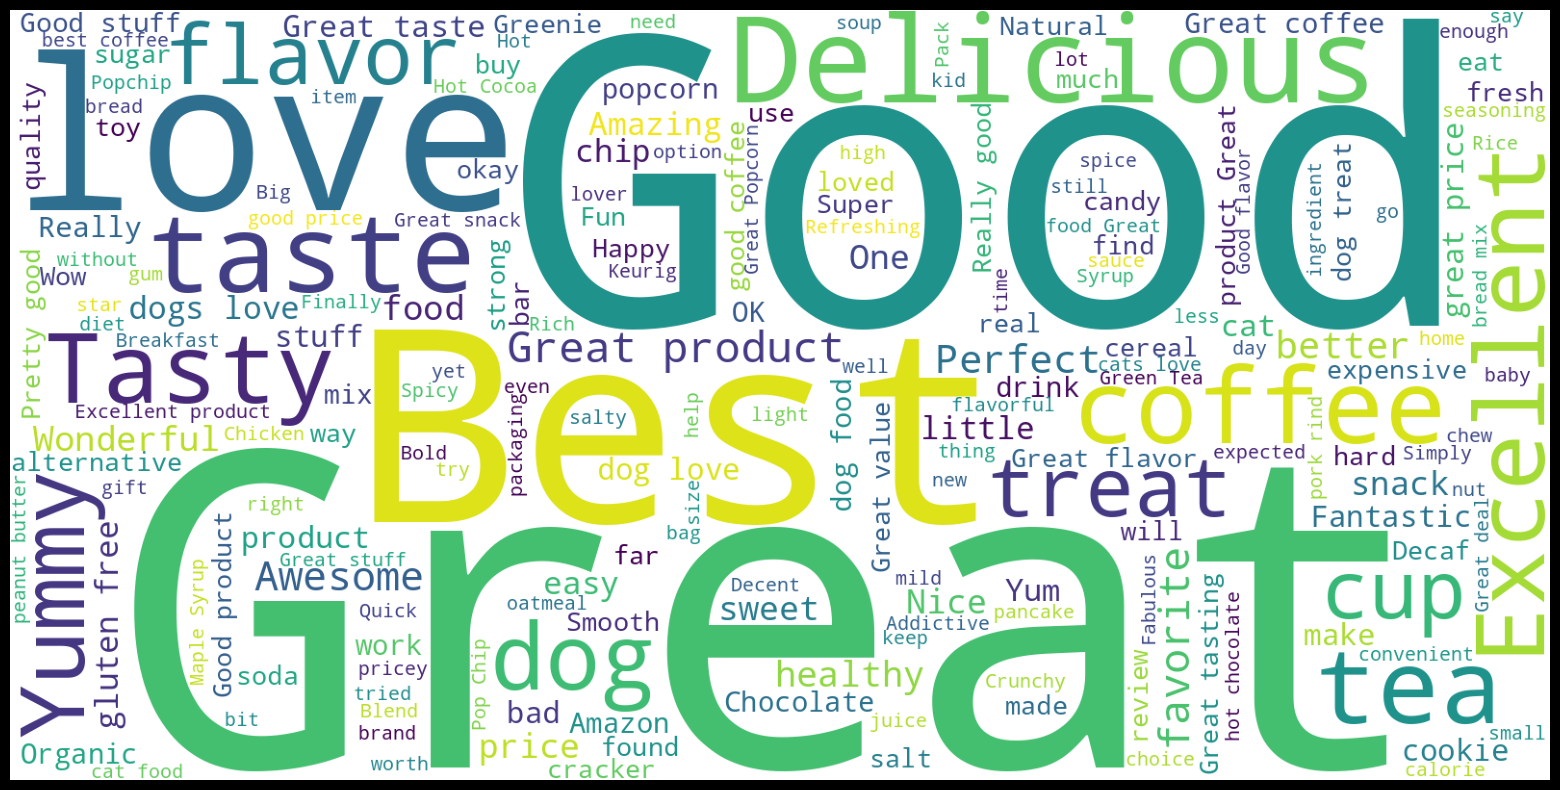

In [20]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating2['Summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

In [21]:
import spacy
nlp=spacy.load('en_core_web_sm')
from spacy import displacy
doc=nlp(u'The blue pen was over the oval table.')

In [22]:
displacy.render(doc, style='dep')

In [23]:
doc1=nlp(u'I am Namrata Kapoor and I love NLP.')
options={'distance':110,'compact':'True', 'color':'white','bg':'#FF5733','font':'Times'}
displacy.render(doc1, style='dep',options=options)